<a href="https://colab.research.google.com/github/Plagistus/PythonAufgabe02/blob/master/ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

In [3]:
import pylab as pl

In [4]:
# import Iris datenset
iris = datasets.load_iris()

In [21]:
#set X,y - take the first two attributes for the iris data
X = iris.data[:, :2]
y = iris.target
class_names = iris.target_names

#setting the "quality" of the plots
h= .02

In [19]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

K_Value: 1
T_Value: 0.1
Confusion matrix, without normalization
[[4 0 0]
 [0 6 1]
 [0 1 3]]


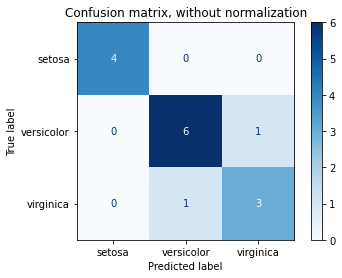

 
/-----------------------------/ 
 
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.85714286 0.14285714]
 [0.         0.25       0.75      ]]


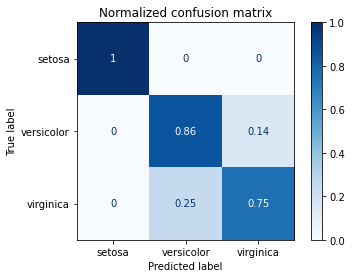

 
/-----------------------------/ 
 


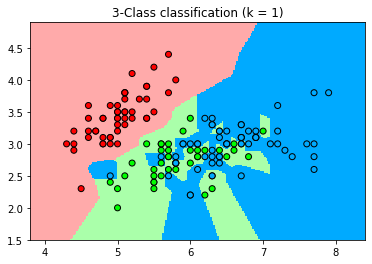

---------------------------------------------
---------------------------------------------
K_Value: 3
T_Value: 0.1
Confusion matrix, without normalization
[[4 0 0]
 [0 7 0]
 [0 2 2]]


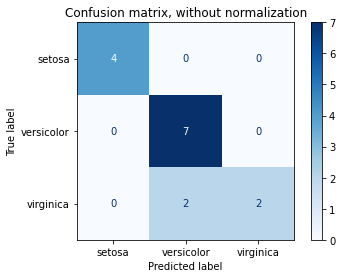

 
/-----------------------------/ 
 
Normalized confusion matrix
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.5 0.5]]


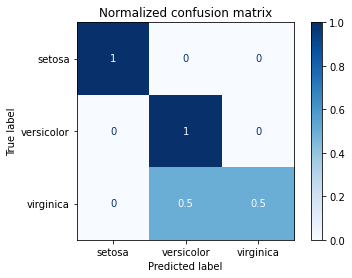

 
/-----------------------------/ 
 


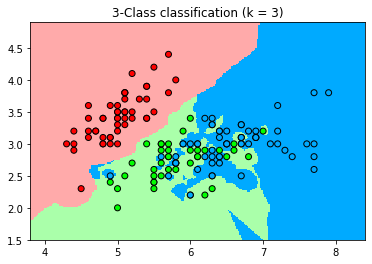

---------------------------------------------
---------------------------------------------
K_Value: 15
T_Value: 0.1
Confusion matrix, without normalization
[[4 0 0]
 [0 7 0]
 [0 2 2]]


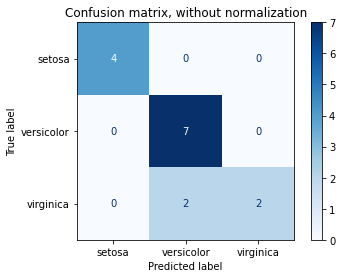

 
/-----------------------------/ 
 
Normalized confusion matrix
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.5 0.5]]


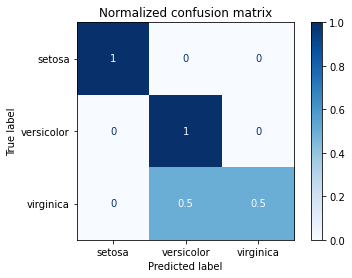

 
/-----------------------------/ 
 


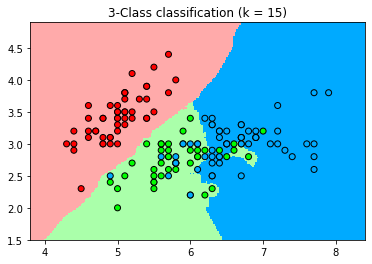

---------------------------------------------
---------------------------------------------
K_Value: 1
T_Value: 0.3
Confusion matrix, without normalization
[[16  0  0]
 [ 0 10  4]
 [ 0  5 10]]


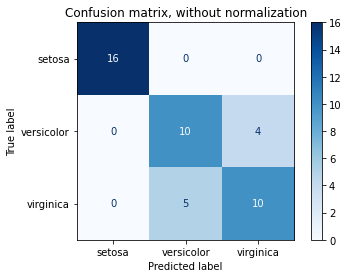

 
/-----------------------------/ 
 
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.71428571 0.28571429]
 [0.         0.33333333 0.66666667]]


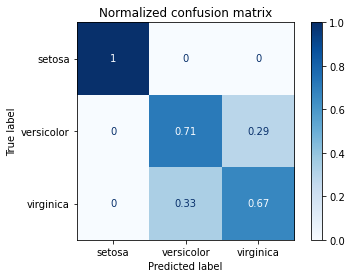

 
/-----------------------------/ 
 


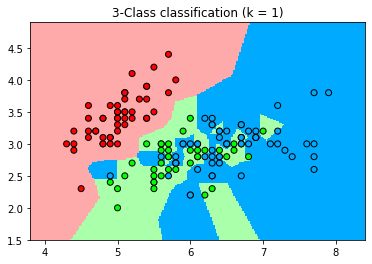

---------------------------------------------
---------------------------------------------
K_Value: 3
T_Value: 0.3
Confusion matrix, without normalization
[[16  0  0]
 [ 0 11  3]
 [ 0  6  9]]


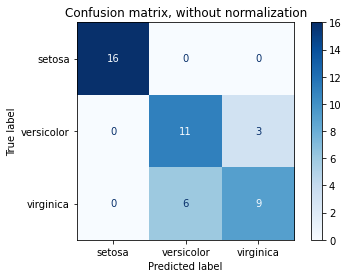

 
/-----------------------------/ 
 
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.78571429 0.21428571]
 [0.         0.4        0.6       ]]


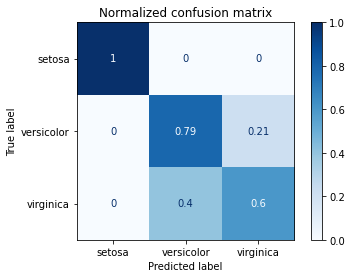

 
/-----------------------------/ 
 


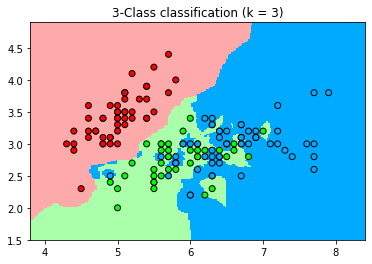

---------------------------------------------
---------------------------------------------
K_Value: 15
T_Value: 0.3
Confusion matrix, without normalization
[[16  0  0]
 [ 0 11  3]
 [ 0  5 10]]


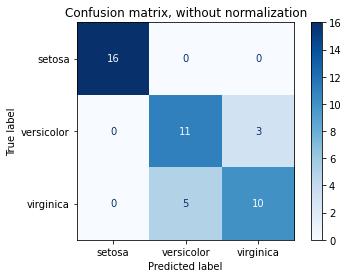

 
/-----------------------------/ 
 
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.78571429 0.21428571]
 [0.         0.33333333 0.66666667]]


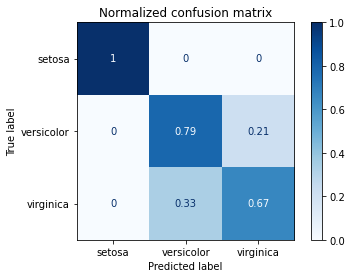

 
/-----------------------------/ 
 


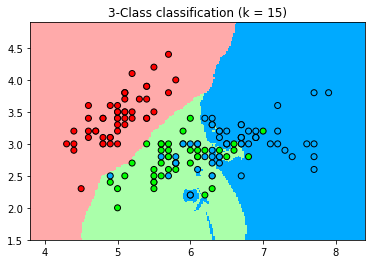

---------------------------------------------
---------------------------------------------


In [42]:
#arrays for test and k value
test_range = [0.10, 0.30]
k_range = [1,3,15]

cmap_bold = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_light = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])


for t in test_range:
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, random_state = 40)
  
  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    y_pred = knn.fit(X_train, y_train).predict(X_test)

    clf = SVC(random_state=40)
    clf.fit(X_train, y_train)
    print(f"K_Value: {k}")
    print(f"T_Value: {t}")
    #print(classification_report(y_test, y_pred))

    for title, normalize in titles_options:
      disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
      pl.figure(1, figsize=(4, 3))
      disp.ax_.set_title(title)
      print(title)
      print(disp.confusion_matrix)
      plt.show()
      print(" ")
      print("/-----------------------------/ ")
      print(" ")


    #Grafische darstellung
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_bold, shading='auto')


    # Plot also the training points
    pl.scatter(X[:,0], X[:,1],c=y , cmap=cmap_light, edgecolors='#000000')
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.title("3-Class classification (k = %i)" % (k))  

    pl.show()
    print("---------------------------------------------")
    print("---------------------------------------------")